# Задание 2. Практическое задание по применению bootstrap, случайного леса и bagging в задаче кредитного скоринга

## Цель - построение модели для задачи кредитного скоринга.

### Использовать датасет по кредитного скоринга, например credit_scoring_sample.csv, представленный в каталоге с наборами данных для лабораторной работы 6.

### Упражнение 2.1.

#### В зале суда есть 5 присяжных, каждый из них по отдельности с вероятностью 70% может правильно определить, виновен подсудимый или нет. С какой вероятностью они все вместе вынесут правильный вердикт, если решение принимается большинством голосов?


    - 70.00%
    - 83.20%
    - 83.70%
    - 87.50%


#### Прогнозируемая переменная: SeriousDlqin2yrs – Человек не выплатил данный кредит в течение 90 дней; возможные значения 1/0.

#### Независимые признаки:

    - age – Возраст заёмщика кредитных средств; тип - integer
    - NumberOfTime30-59DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 30-59 дней, но не больше в течение последних двух лет; тип - integer
    - DebtRatio – Ежемесячный отчисления на задолжености(кредиты,алименты и т.д.) / совокупный месячный доход percentage; тип - real
    - MonthlyIncome – Месячный доход в долларах; тип - real
    - NumberOfTimes90DaysLate – Количество раз, когда человек имел просрочку выплаты других кредитов более 90 дней; тип - integer
    - NumberOfTime60-89DaysPastDueNotWorse – Количество раз, когда человек имел просрочку выплаты других кредитов более 60-89 дней, но не больше в течение последних двух лет; тип - integer
    - NumberOfDependents – Число человек в семье кредитозаёмщика; тип - integer


In [3]:
# Disable warnings in Anaconda
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [5]:
## Сделаем функцию, которая будет заменять NaN значения на медиану в каждом столбце таблицы
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [6]:
## Считываем данные
data = pd.read_csv("datasets/credit_scoring_sample.csv", sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [7]:
## Рассмотрим типы считанных данных
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Distribution of target


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

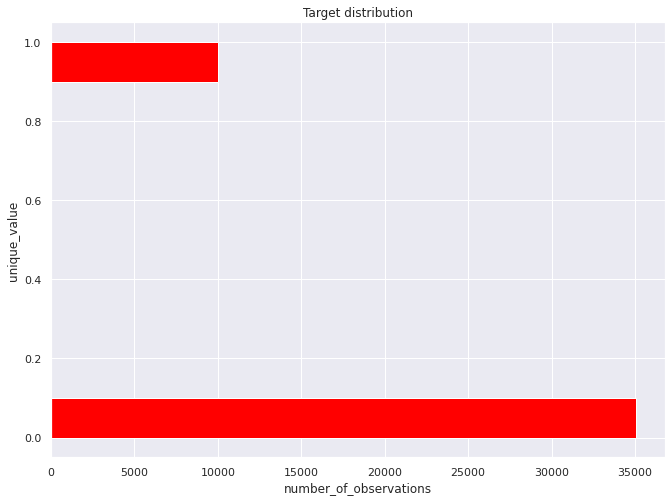

In [8]:
## Посмотрим на распределение классов в зависимой переменной

ax =data['SeriousDlqin2yrs'].hist(orientation='horizontal', color='red')
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print('Distribution of target')
data['SeriousDlqin2yrs'].value_counts()/data.shape[0]

In [9]:
## Выберем названия всех признаков из таблицы, кроме прогнозируемого

independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [10]:
## Применяем функцию, заменяющую все NaN значения соответствующего столбца
table = fill_nan(data)

In [11]:
## Разделяем таргет и признаки
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

## Упражнение 2.2.

### Сделайте интервальную оценку среднего возраста клиентов, просрочивших погашение кредита, при доверительном уровне 90%. При необходимости используйте пример из статьи в качестве справки. Кроме того, используйте np.random.seed(0), как это сделано в статье. Какова полученная интервальная оценка?

    - 52,59 – 52,86
    - 45,71 – 46,13
    - 45,68 – 46,17
    - 52,56 – 52,88


In [12]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries


bad_client= data[data['SeriousDlqin2yrs']  == 1]['age'].values


np.random.seed(0)



bad_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(bad_client, 1000)]


print("age calls from bad_client:  mean interval",  stat_intervals(bad_mean_scores, 0.1))

age calls from bad_client:  mean interval [45.71379414 46.12700479]


## Подбор параметров для модели логистической регрессии

### Одной из важных метрик качества модели является значение площади под ROC-кривой. Значение ROC-AUC лежит от 0 до 1. Чем ближе начение метрики ROC-AUC к 1, тем качественнее происходит классификация моделью.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## Используем модуль LogisticRegression для построения логистической регрессии.
## Из-за несбалансированности классов  в таргете добавляем параметр балансировки.
## Используем также параметр random_state=5 для воспроизводимости результатов
lr = LogisticRegression(random_state=5, class_weight="balanced")

## Попробуем подобрать лучший коэффициент регуляризации (коэффициент C в логистической регрессии) для модели лог.регрессии.
## Этот параметр необходим для того, чтобы подобрать оптимальную модель, которая не будет переобучена, с одной стороны,
## и будет хорошо предсказывать значения таргета, с другой.
## Остальные параметры оставляем по умолчанию.
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

## Для того, чтобы подобрать коэффициент регуляризации, попробуем для каждого его возможного значения посмотреть
## значения roc-auc на стрэтифайд кросс-валидации из 5 фолдов с помощью функции StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

## Упражнение 2.3

### Сделайте GridSearch с метрикой "roc-auc" по параметру C. Какое оптимальное значение параметра С?

In [14]:
%%time
grid_search = GridSearchCV(lr,parameters, n_jobs=-1,scoring = 'roc_auc',cv=skf)
grid_search = grid_search.fit(X,y)
grid_search.best_estimator_

/home/alex/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

CPU times: user 920 ms, sys: 117 ms, total: 1.04 s
Wall time: 5.97 s


LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [15]:
print('оптимальное значение параметра С = ' + str(grid_search .best_params_['C']))

оптимальное значение параметра С = 0.001


## Упражнение 2.4

### Можно ли считать лучшую модель устойчивой? (модель считаем устойчивой, если стандартное отклонение на валидации меньше 0.5%) Сохраните точность лучшей модели, она вам приходится для следующих заданий

In [16]:
log_accuracy = grid_search.best_score_

best_intex = grid_search.best_index_
if (0.5>(grid_search.cv_results_['std_test_score'][best_intex])):
    print ("Да модель устойчива")
else:
    print ("Нет, модель не устойчива")
    
grid_search.cv_results_['std_test_score'][best_intex]

Да модель устойчива


0.008137559189742445

# Определение влияния признаков

## Упражнение 2.5.

### Определите самый важный признак. Важность признака определяется абсолютным значением его коэффициента. Так же нужно нормализировать все признаки, что бы можно их было корректно сравнить. 

In [17]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X)

lr = LogisticRegression(random_state=5, class_weight= 'balanced',**grid_search.best_params_)

lr.fit(X_norm,y)

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [37]:
features = pd.DataFrame(data=lr.coef_ , columns=independent_columns_names)

best_feature = features.apply(lambda x : abs(x)).T

In [36]:
print('самый важный признак = NumberOfTime30-59DaysPastDueNotWorse')

самый важный признак = NumberOfTime30-59DaysPastDueNotWorse


In [19]:
best_feature

,0
age,0.416702
NumberOfTime30-59DaysPastDueNotWorse,0.723427
DebtRatio,0.024096
NumberOfTimes90DaysLate,0.516788
NumberOfTime60-89DaysPastDueNotWorse,0.193558
MonthlyIncome,0.163146
NumberOfDependents,0.101443


## Упражнение 2.6.

### Посчитайте долю влияния DebtRatio на предсказание. (Воспользуйтесь функцией softmax)

In [20]:
def softmax(x):
    maxx = np.max(x)
    e_x  = np.exp(x- maxx)
    return e_x / e_x.sum()

tempd = pd.DataFrame(data=softmax(lr.coef_), columns=independent_columns_names).T


print ('доля влияния DebtRatio на предсказание = ' + str(round(tempd.loc['DebtRatio',0],4)) + "%")

доля влияния DebtRatio на предсказание = 0.1143%


## Упражнение 2.7.

### Посмотрим как можно интерпретировать влияние наших признаков. Для этого заного оценим логистическую регрессию в абсолютных величинах. После этого посчитайте во сколько раз увеличатся шансы, что клиент не выплатит кредит, если увеличить возраст на 20 лет при всех остальных равных значениях признаков. (теоретический расчет можно посмотреть здесь)

In [21]:
%%time
lr = LogisticRegression(random_state=5, class_weight= 'balanced',**grid_search.best_params_)

lr.fit(X,y)

CPU times: user 834 ms, sys: 14.9 ms, total: 849 ms
Wall time: 462 ms


LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [22]:
age_coef_ =lr.coef_[0][0] 
print('в '+ str(np.exp(age_coef_*20)) +' раз увеличатся шансы, что клиент не выплатит кредит, если увеличить возраст на 20 лет при всех остальных равных значениях признаков')

в 0.7223190286075255 раз увеличатся шансы, что клиент не выплатит кредит, если увеличить возраст на 20 лет при всех остальных равных значениях признаков


## Случайный лес

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Инициализируем случайный лес с 100 деревьями и сбалансированными классами
rf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    oob_score=True,
    class_weight="balanced",
)

## Будем искать лучшие параметры среди следующего набора
parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

## Делаем опять же стрэтифайд k-fold валидацию. Инициализация которой должна у вас продолжать храниться в skf

## Упраженние 2.8

### На сколько точность лучшей модели случайного леса выше точности логистической регрессии на валидации?

In [24]:
%%time
clf_grid = GridSearchCV(rf, parameters,cv=skf, n_jobs=-1,verbose=1,scoring='roc_auc')
clf_grid.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: user 5.26 s, sys: 58.7 ms, total: 5.32 s
Wall time: 4min 19s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [1, 2, 4],
                         'min_samples_leaf': [3, 5, 7, 9]},
             scoring='roc_auc', verbose=1)

In [25]:
print("точность лучшей модели случайного леса выше точности логистической регрессии на валидации на " +str((clf_grid.best_score_-log_accuracy)*100))

точность лучшей модели случайного леса выше точности логистической регрессии на валидации на 2.6866475306627002


## Упраженние 2.9

### Определите какой признак имеет самое слабое влияние.

In [26]:
%%time
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=5, oob_score=True, class_weight='balanced',**clf_grid.best_params_)
rf.fit(X,y)

CPU times: user 4.87 s, sys: 40.3 ms, total: 4.91 s
Wall time: 1.96 s


RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=2,
                       min_samples_leaf=9, n_jobs=-1, oob_score=True,
                       random_state=5)

In [27]:
weak_feat= pd.DataFrame(data=rf.feature_importances_,index=independent_columns_names)

weak_feat = weak_feat.apply( lambda x: abs(x),axis = 0)

weak_feat['name'] = weak_feat.index

weak_feat.sort_values([0],ascending=True,inplace=True)


print('самое слабое влияние имеет признак ',weak_feat.iloc[0].name)

самое слабое влияние имеет признак  NumberOfDependents


In [38]:
weak_feat

,0,name
NumberOfDependents,0.015225,NumberOfDependents
MonthlyIncome,0.059059,MonthlyIncome
DebtRatio,0.076623,DebtRatio
age,0.111846,age
NumberOfTime60-89DaysPastDueNotWorse,0.160846,NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate,0.287390,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,0.289010,NumberOfTime30-59DaysPastDueNotWorse


## Упражнение 2.10.

### Какое наиболее существенное примущество логистической регрессии перед случайным лесом для нашей бизнес-задачи?

    меньше тратится времени для тренировки модели;
    меньше параметров для перебора;
    интепретируемость признаков;
    линейные свойства алгоритма.


In [28]:
print("примущество логистической регрессии в том, что мы можем интерпретировать коэффициенты признаков на результат")

примущество логистической регрессии в том, что мы можем интерпретировать коэффициенты признаков на результат


# Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

## Упражнение 2.11

### Следующая задача обучить бэггинг классификатор (random_state=42). В качестве базовых классификаторов возьмите 100 логистических регрессий и на этот раз используйте не GridSearchCV, а RandomizedSearchCV. Так как перебирать все 54 варианта комбинаций долго, то поставьте максимальное число итераций 20 для RandomizedSearchCV. Также не забудьте передать параметр валидации cv и random_state=1. Какая лучшая точность (ROC AUC) получилась?

    80.75%
    80.12%
    79.62%
    76.50%

In [30]:
%%time
bc=BaggingClassifier(LogisticRegression(class_weight= 'balanced'),random_state=42,n_estimators=100, n_jobs=-1)

clf_grid_2 = RandomizedSearchCV(bc, parameters,cv=skf, n_jobs=-1, random_state=1,n_iter=20,scoring='roc_auc')
clf_grid_2.fit(X,y)

/home/alex/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

CPU times: user 386 ms, sys: 36.9 ms, total: 423 ms
Wall time: 8min 55s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                                               n_estimators=100, n_jobs=-1,
                                               random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'base_estimator__C': [0.0001, 0.001,
                                                              0.01, 1, 10,
                                                              100],
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   random_state=1, scoring='roc_auc')

In [31]:
print(" точность бэггинг классификатора = "+str(clf_grid_2.best_score_))

 точность бэггинг классификатора = 0.8087951623513827


In [32]:
clf_grid_2.best_params_

{'max_samples': 0.9, 'max_features': 2, 'base_estimator__C': 100}

## Упражнение 2.12

### Дайте интерпретацию лучших параметров для бэггинга. Почему эти значения max_features и max_samples являются лучшими?

    для бэггинга важно использовать как можно меньше признаков.
    бэггинг лучше работает на небольших выборках.
    меньше корреляция между одиночными моделями.
    чем больше признаков, тем меньше теряется информации.

In [33]:
print("для достижения лучшей точности нам необходимо достичь меньшей корреляции между одиночными моделями, следавательно при этих параметрах модель оказалась менее коррелируемая между собой")

для достижения лучшей точности нам необходимо достичь меньшей корреляции между одиночными моделями, следавательно при этих параметрах модель оказалась менее коррелируемая между собой
